<a href="https://colab.research.google.com/github/Harshitakhore/OIBSIP/blob/main/Harshita_Khore_0801CA221023_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/test.csv'):
  for dirname, _, filenames in os.walk('/content/drive/MyDrive/train.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(train_df)
clean_dataset(test_df)

,x,y
0,77.0,79.775152
1,21.0,23.177279
2,22.0,25.609262
3,20.0,17.857388
4,36.0,41.849864
...,...,...
295,71.0,68.545888
296,46.0,47.334876
297,55.0,54.090637
298,62.0,63.297171


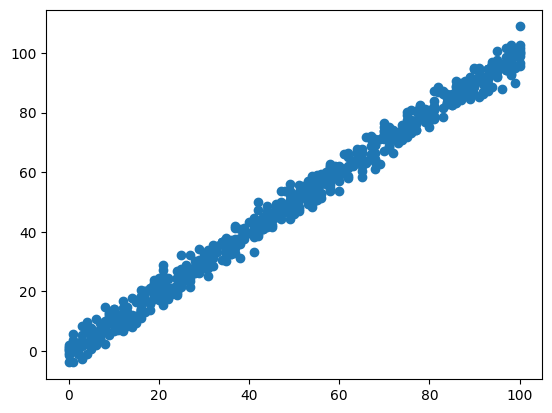

In [5]:
x = train_df['x']
y = train_df['y']

x_test = test_df['x']
y_test = test_df['y']

plt.plot(x, y, 'o')
plt.show()

In [6]:
# checking whether these contains NaN or inf values
print(np.any(np.isnan(x)))
print(np.any(np.isnan(y)))

print(np.all(np.isfinite(x)))
print(np.all(np.isfinite(y)))

print(np.any(np.isnan(x_test)))
print(np.any(np.isnan(y_test)))

print(np.all(np.isfinite(x_test)))
print(np.all(np.isfinite(y_test)))

False
False
True
True
False
False
True
True


In [7]:
x = x.values
x_test = x_test.values

print(type(x), type(x_test))


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [8]:
#because linear regression do not take data like [1,32,4,55,5]
#instead it takes it like [[1], [32], [4], [55], [5]] so we made x 2D
x = x.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

print(x.shape)
x.dtype

(699, 1)


dtype('float64')

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression().fit(x, y)

In [11]:
pred = reg.predict(x_test)

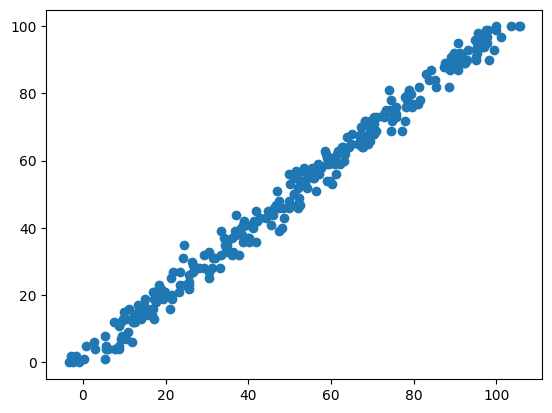

In [12]:
plt.scatter(y_test, pred)

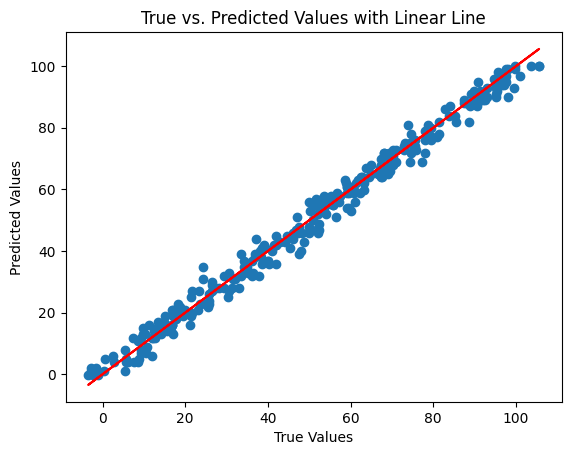

In [13]:
from sklearn.linear_model import LinearRegression

# ... (Your previous code remains unchanged up to this point)

# Fitting linear regression
reg = LinearRegression().fit(x, y)
pred = reg.predict(x_test)

# Scatter plot with the linear line
plt.scatter(y_test, pred)
plt.plot(y_test, y_test, color='red')  # Plotting the ideal linear line (y_test vs. y_test)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values with Linear Line')
plt.show()


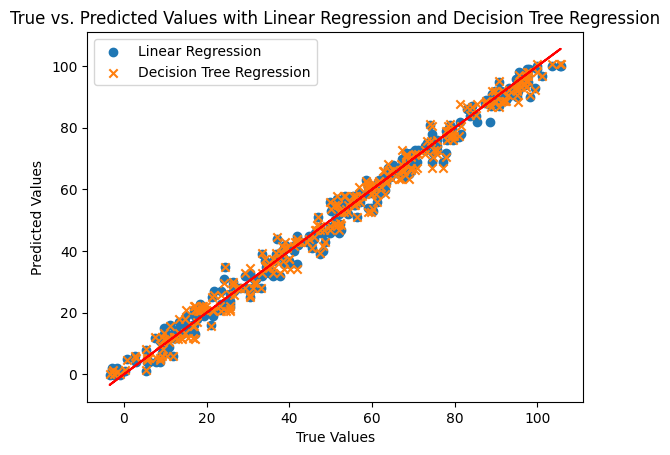

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# ... (Your previous code remains unchanged up to this point)

# Fitting linear regression
reg_linear = LinearRegression().fit(x, y)
pred_linear = reg_linear.predict(x_test)

# Fitting decision tree regression
reg_tree = DecisionTreeRegressor().fit(x, y)
pred_tree = reg_tree.predict(x_test)

# Scatter plot with predictions from both algorithms
plt.scatter(y_test, pred_linear, label='Linear Regression')
plt.scatter(y_test, pred_tree, label='Decision Tree Regression', marker='x')
plt.plot(y_test, y_test, color='red')  # Plotting the ideal linear line (y_test vs. y_test)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values with Linear Regression and Decision Tree Regression')
plt.legend()
plt.show()


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the training and testing data (x, y, x_test, y_test) from your previous code

# Linear Regression
reg_linear = LinearRegression().fit(x, y)
pred_linear = reg_linear.predict(x_test)
mse_linear = mean_squared_error(y_test, pred_linear)
r2_linear = r2_score(y_test, pred_linear)

# Decision Tree Regression
reg_tree = DecisionTreeRegressor().fit(x, y)
pred_tree = reg_tree.predict(x_test)
mse_tree = mean_squared_error(y_test, pred_tree)
r2_tree = r2_score(y_test, pred_tree)

# Random Forest Regression (example, you can add more algorithms)
reg_rf = RandomForestRegressor().fit(x, y)
pred_rf = reg_rf.predict(x_test)
mse_rf = mean_squared_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)

# Displaying results
print(f'Linear Regression - MSE: {mse_linear}, R-squared: {r2_linear}')
print(f'Decision Tree Regression - MSE: {mse_tree}, R-squared: {r2_tree}')
print(f'Random Forest Regression - MSE: {mse_rf}, R-squared: {r2_rf}')

Linear Regression - MSE: 9.432922192039305, R-squared: 0.9888014444327563
Decision Tree Regression - MSE: 10.80868185383003, R-squared: 0.9871681731403525
Random Forest Regression - MSE: 10.720262940709002, R-squared: 0.9872731421087828


In [16]:
from sklearn.metrics import mean_squared_error, r2_score, precision_score, accuracy_score

# Calculating accuracy for Linear Regression
accuracy_linear = r2_score(y_test, pred_linear)

# Calculating precision for Linear Regression (Not typically used for regression problems)
# You may replace it with other appropriate metrics like mean squared error
precision_linear = mean_squared_error(y_test, pred_linear)

# Calculating accuracy for Decision Tree Regression
accuracy_tree = r2_score(y_test, pred_tree)

# Calculating precision for Decision Tree Regression (Not typically used for regression problems)
# You may replace it with other appropriate metrics like mean squared error
precision_tree = mean_squared_error(y_test, pred_tree)

print(f'Accuracy (Linear Regression): {accuracy_linear}')
print(f'Precision (Linear Regression): {precision_linear}')

print(f'Accuracy (Decision Tree Regression): {accuracy_tree}')
print(f'Precision (Decision Tree Regression): {precision_tree}')


Accuracy (Linear Regression): 0.9888014444327563
Precision (Linear Regression): 9.432922192039305
Accuracy (Decision Tree Regression): 0.9871681731403525
Precision (Decision Tree Regression): 10.80868185383003


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the true values (y_test) and predictions (pred_linear, pred_tree)

# Calculate MSE and R-squared for Linear Regression
mse_linear = mean_squared_error(y_test, pred_linear)
r2_linear = r2_score(y_test, pred_linear)

# Calculate MSE and R-squared for Decision Tree Regression
mse_tree = mean_squared_error(y_test, pred_tree)
r2_tree = r2_score(y_test, pred_tree)

# Display results
print(f'Linear Regression - MSE: {mse_linear}, R-squared: {r2_linear}')
print(f'Decision Tree Regression - MSE: {mse_tree}, R-squared: {r2_tree}')


Linear Regression - MSE: 9.432922192039305, R-squared: 0.9888014444327563
Decision Tree Regression - MSE: 10.80868185383003, R-squared: 0.9871681731403525
